# Ejercicio 2

## A

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def pca_transform(X, n_componentes):
    X_mean = np.mean(X, axis = 0)
    X_centrado = X - X_mean

    #Calculo la matriz de covarianza
    matriz_cov = np.cov(X_centrado.T)

    # print("matriz de covarianza ", matriz_cov.shape)  # Debe ser (64, 64)

    #Calculo autovalores y autovectores
    eigvals, eigvecs = np.linalg.eigh(matriz_cov)

    # print("autovalores ", eigvals.shape)    # Debe ser (64,)
    # print("autovectores ", eigvecs.shape)   # Debe ser (64, 64)

    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    componentes_principales = eigvecs[:, :n_componentes]
    X_pca = np.dot(X_centrado, componentes_principales)

    return X_pca, eigvals, componentes_principales

## B

Dimensiones de la imagen: (350, 476)


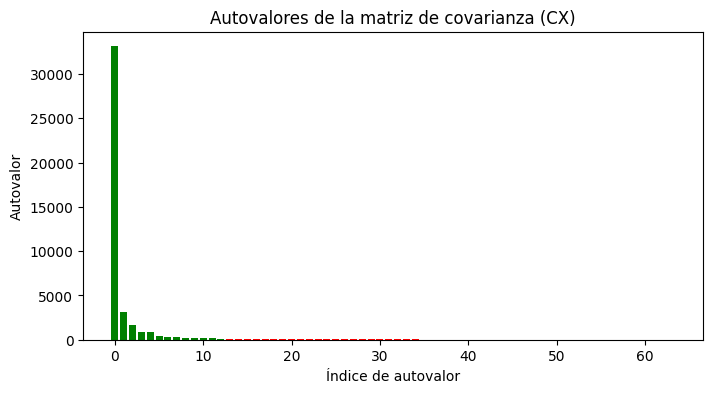

In [ ]:
img = np.array(Image.open('imagenes/img_03.jpg').convert('L')).astype(float)

# print(f"Dimensiones de la imagen: {img.shape}")

def dividir_imagen(img, tamano_bloque = 8):
    h, w = img.shape
    bloques = []
    for i in range(0, h, tamano_bloque):
        for j in range(0, w, tamano_bloque):
            bloque = img[i:i+tamano_bloque, j:j+tamano_bloque]
            if bloque.shape == (tamano_bloque, tamano_bloque):
                bloques.append(bloque.flatten())
    return np.array(bloques)

bloques = dividir_imagen(img, tamano_bloque = 8)
# print("bloques shape ", bloques.shape)

total_dim = bloques.shape[1]
n_componentes = int(np.ceil(total_dim * (1- 0.8)))

X_pca, eigvals, componentes_principales = pca_transform(bloques, n_componentes)

plt.figure(figsize=(8,4))
plt.bar(range(len(eigvals)), eigvals, color='red', label='Descartados')
plt.bar(range(n_componentes), eigvals[:n_componentes], color='green', label='Conservados')
plt.xlabel('Índice de autovalor')
plt.ylabel('Autovalor')
plt.title('Autovalores de la matriz de covarianza (CX)')
plt.show()

# Ejercicio 3

## A

In [16]:
def reconstruir_bloques(X_pca, componentes_principales, medias):
    X_rec = np.dot(X_pca, componentes_principales.T) + medias
    return X_rec

def reconstruir_imagen(bloques_rec, img_shape, tamano_bloque=8):
    h, w = img_shape
    img_rec = np.zeros((h, w))
    idx = 0
    for i in range(0, h - tamano_bloque + 1, tamano_bloque):
        for j in range(0, w - tamano_bloque + 1, tamano_bloque):
            if idx < len(bloques_rec):
                bloque = bloques_rec[idx].reshape((tamano_bloque, tamano_bloque))
                img_rec[i:i+tamano_bloque, j:j+tamano_bloque] = bloque
                idx += 1
    return img_rec


medias = np.mean(bloques, axis=0)
bloques_rec = reconstruir_bloques(X_pca, componentes_principales, medias)
img_rec = reconstruir_imagen(bloques_rec, img.shape, tamano_bloque = 8)

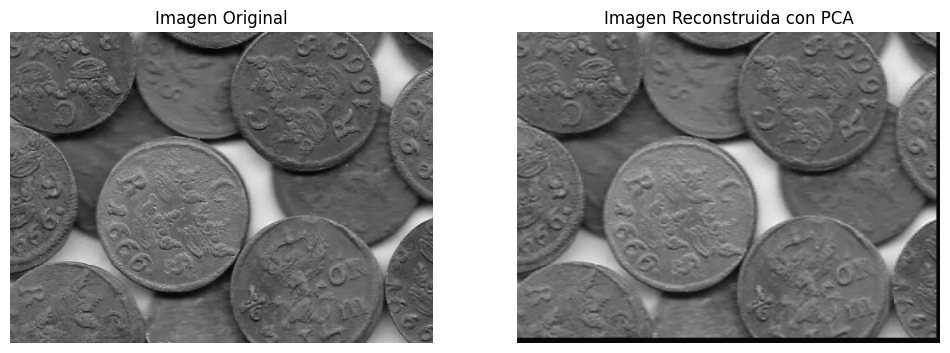

In [17]:
#Grafico la imagen reconstruida con su comparación

plt.figure(figsize=(12,6)) 
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_rec, cmap='gray')
plt.title('Imagen Reconstruida con PCA')
plt.axis('off')
plt.show()